In [1]:
from experiment.experiment import Experiment
from envs.bandits import BanditFactory
from algorithms.algorithms import AlgorithmFactory

In [2]:
from algorithms.uniform import Uniform
from algorithms.ecolog import ECOLOG
from algorithms.max_uncertainty import MaxUncertainty
from algorithms.lucb import LUCB

from envs.guassian_bandit import GuassianBandit
from envs.adv4_bandit import Adv4Bandit

In [7]:
uniform_factory = AlgorithmFactory(Uniform, "uniform", [])
maxuncertainty_factory = AlgorithmFactory(
    MaxUncertainty, "max_uncertainty", ["param_norm_ub"]
)
ecolog_factory = AlgorithmFactory(ECOLOG, "ecolog", ["param_norm_ub"])
guassian_factory = BanditFactory(
    GuassianBandit,
    "guassian",
    n_arms=5,
    n_contexts=10,
    d=10,
    fit_into_unit_ball=True,
)
LUCB_factory = AlgorithmFactory(LUCB, "lucb", ["param_norm_ub"])

adv_factory = BanditFactory(
    Adv4Bandit,
    "needle",
    n_arms=10,
    n_contexts=10,
    d=10,
    fit_into_unit_ball=True,
)
experiment = Experiment(
    [adv_factory],
    [uniform_factory, ecolog_factory, maxuncertainty_factory, LUCB_factory],
)

In [8]:
from experiment.simple_regret import SimpleRegret

simple_regret_callback = SimpleRegret(interval=100)
experiment.add_callback(simple_regret_callback)

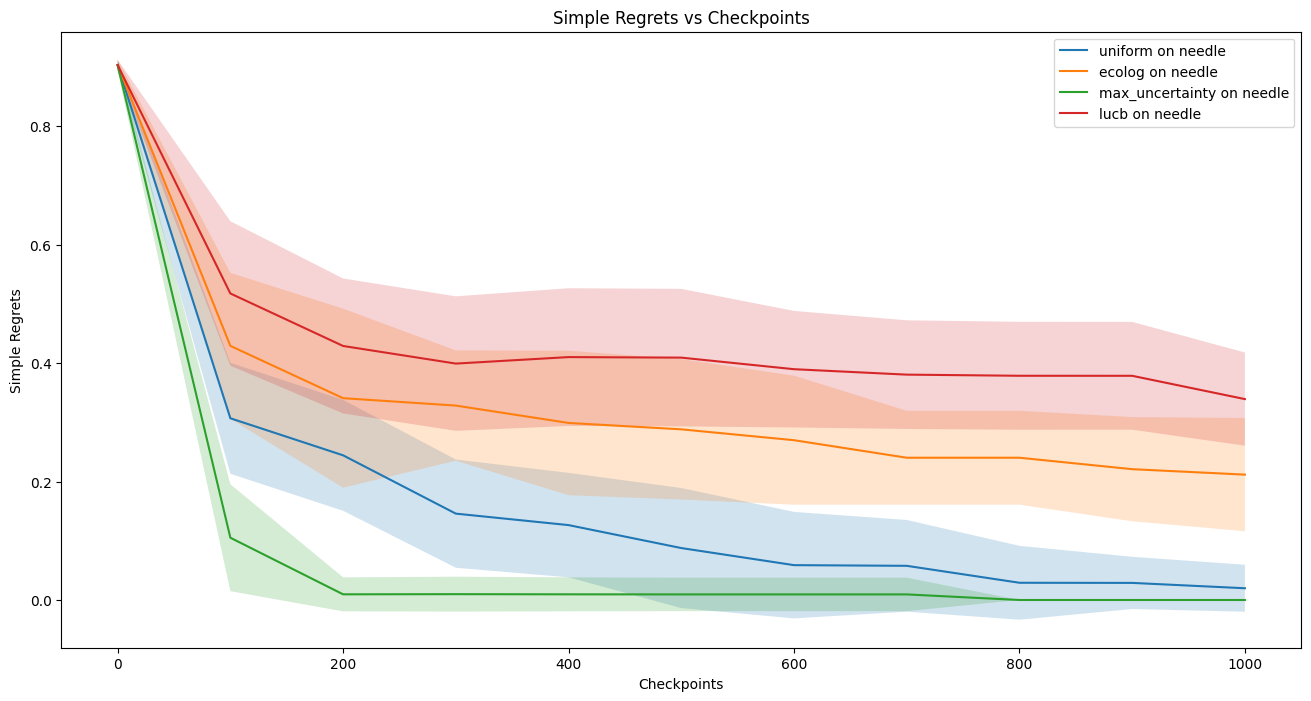

In [9]:
experiment.interact(n_steps=1000, n_runs=10)